# Fundamentals of Data Science - Week 3 and Week 4 

###  <span style='color: green'>See Canvas croll down to the bottom of the notebook for assignment details</span> 
<p></p>
<span style='color: red'>Deadline: 27/09/19, 23:59:59 </span>


In this notebook we are going to cover the following practical aspects of data science:
+ Gathering data (scraping the Twitter Streaming API)
+ Storing and organizing it (store to file or a database)
+ Preprocess the data
+ Perform sentiment, topical and correlation analysis
+ Visualize

To complete this assignment you need to have a running Anaconda installation with Python 3.6/3.7 on your device. Python package prerequisites include:
+  **Twitter API Client** [Tweepy](https://github.com/tweepy/tweepy) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [Install command: **pip install tweepy**]
+  **Python Data Analysis Library** [Pandas](https://pandas.pydata.org/pandas-docs/stable/install.html)  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  [Install command: **pip install pandas**]
+  **Python Visualization Library** [MatPlotLib](https://matplotlib.org/)   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [Install command: **python -m pip install matplotlib**]
+  **Python Topic Modelling Library** [GENSIM](https://radimrehurek.com/gensim/install.html) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  [Install command: **pip install --upgrade gensim**]

An additional requirement if **you would like to use a database** is MongoDB (Community Server):
+ MongoDB database server instance [MongoDB Installation Instructions](https://docs.mongodb.com/manual/tutorial/install-mongodb-on-ubuntu/#install-mongodb-community-edition)
+ **Windows download** (and perhaps linux, untested): [link](https://www.mongodb.com/download-center?jmp=nav#community)
+  **Python-Mongo Database Client** [PyMongo](https://api.mongodb.com/python/current/)  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  [Install command: **python -m pip install pymongo**]

## Gathering Data - Twitter API

The public Twitter API consists of a REST API and a Streaming API. Most application developers mix and match the APIs to produce their application. The Streaming API provides low-latency high-volume access to Tweets. Additionally, there are some families of APIs (such as the Ads API) which require your application to be whitelisted in order to make use of them. For this assignment we are going to use the [**Twitter Streaming API**](https://dev.twitter.com/streaming/overview).

### Twitter Streaming API

The Streaming APIs give developers low latency access to Twitter’s global stream of Tweet data. A streaming client will be pushed messages indicating Tweets and other events have occurred, without any of the overhead associated with polling a REST endpoint.

Twitter offers several basic streaming endpoints, each customized to certain use cases:
+ **Public Streams** - Streams of the public data flowing through Twitter. Suitable for following specific users or topics, and data mining.
+ **User Streams** &nbsp;&nbsp;&nbsp;- Single-user streams, containing roughly all of the data corresponding with a single user’s view of Twitter.
+ **Site Streams** &nbsp;&nbsp;&nbsp;&nbsp;- The multi-user version of user streams. Site streams are intended for servers which must connect to Twitter on behalf of many users. Site Streams is a closed beta. Applications are no longer being accepted.

In this assignment we are going to use the **Twitter Public Streams** to gather data about certain topics of interest. For using the Twitter API we need to create a Twitter Account, a Twitter APP and obtain the API Keys.

### Obtaining Twitter API Keys

In order to access Twitter Streaming API, we need to get 4 pieces of information from Twitter: API key, API secret, Access token and Access token secret. Follow the steps below to get all 4 elements:

+ Create a twitter account if you do not already have one.
+ Go to https://apps.twitter.com/ and log in with your twitter credentials.
+ Click "Create New App"
+ Fill out the form, agree to the terms, and click "Create your Twitter application"
+ In the next page, click on "API keys" tab, and copy your "API key" and "API secret".
+ Scroll down and click "Create my access token", and copy your "Access token" and "Access token secret".

### Connecting to Twitter Streaming API and downloading data

Now that we have the necessary credentials we can use the Tweepy library we installed in the previous step to connect to Twitter and start gathering data.

First we import the required methods from the Tweepy library:


In [1]:
# Import the necessary methods from tweepy library

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream


Next we copy the credentials in separate variables that we are going to use through the entire assignment.

**NOTE** it is a general best practise not to keep sensitive data like API keys in a raw form in your scripts. For simplicity and demonstration purposes we can do that in this excercise, however this is not acceptible in a real live scenario.

In [2]:
consumer_key = 'bdkFIELBrmEWPvpGgeoSpdeFF'
consumer_secret = 'NAaFtFawKZpwtzsv3k3NiRWiO97HWUsQDF0q8xUQvvUmvHCrNI'
access_token = '1175837896789680131-yBLT3BkGhoBqUOk3CgrKi9fyXoSzvS'
access_token_secret = 'lqAimYY8PectGpUYfaoKjA2vfWIkbK6GvBav8DNILVWeT'

Next we specify:
+ The location where we are going to dump the tweets that we obtained through the Streaming API
+ A basic function that formats and stores the tweets in a text file for later usage
+ A class consisting of a listener that attaches to a particular stream and displays the tweets directly onto the screen.

In [3]:
# We need to import json for dumping the tweets into our file
import json 

# Here we specify where the tweets would be stored
tweets_collection = 'tweets.txt'
tweet_file = open(tweets_collection, 'a')

#This a basic python function to append some value to a text file
def dump_tweet_to_json(tweet, dump_file):
     dump_file.write(tweet + '\n')
    
#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    # When we get data through the api print the data on screen
    def on_data(self, data):
        print(data)
        return (True)

    # When an error occures print the status code so that we know what it is.
    def on_error(self, status):
        print (status)

Using the defined class we can authenticate using the example below and attach our listener to a stream that is particularly interested in these topics:
+ Data Science
+ University Of Amsterdam
+ Python
+ Artificial Inteligence

The code section below **will not stop automatically** once you run it (which is the whole point of the streaming API). To stop the execution and move on to the next section interupt the kernel using the **stop symbol** in the top toolbar.

#### Warning, you may have to restart the kernel to halt the stream depending on the Anaconda/tweepy version 

In [4]:
if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API

    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    stream.filter(track=['data science', 'university of amsterdam', 'python', 'artificial intelligence'])

{"created_at":"Tue Sep 24 21:38:05 +0000 2019","id":1176611790752505856,"id_str":"1176611790752505856","text":"@FicapalDe","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":912554314807246848,"in_reply_to_user_id_str":"912554314807246848","in_reply_to_screen_name":"FicapalDe","user":{"id":977977694058176514,"id_str":"977977694058176514","name":"Macavity Morgan","screen_name":"bluesthecat","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":54,"friends_count":148,"listed_count":0,"favourites_count":3956,"statuses_count":1836,"created_at":"Sun Mar 25 18:37:07 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_background_i

{"created_at":"Tue Sep 24 21:38:08 +0000 2019","id":1176611800009314304,"id_str":"1176611800009314304","text":"RT @cummings2020: @AOC Congresswoman, you spirited plea is based on what FACTS? Can you show me scientific data that fits your doomsday sce\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2209613792,"id_str":"2209613792","name":"Robert Lindsay","screen_name":"poisonsky23","location":null,"url":null,"description":"How would you\/your family feel? My baby brother was murdered!  Jedi in training! All fields! Love my Grand-baby Riley! Be real..life is short! #MAGA","translator_type":"none","protected":false,"verified":false,"followers_count":2471,"friends_count":2831,"listed_count":4,"favourites_count":78439,"statuses_cou

{"created_at":"Tue Sep 24 21:38:11 +0000 2019","id":1176611814056058882,"id_str":"1176611814056058882","text":"Cloudian Launches EDGEMATRIX Subsidiary for Artificial Intelligence Processing at the Edge - MarTech Series\u2026 https:\/\/t.co\/Jty2CsnLzV","source":"\u003ca href=\"https:\/\/ifttt.com\" rel=\"nofollow\"\u003eIFTTT\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":702292079444013056,"id_str":"702292079444013056","name":"Artificial Intelligence in Houston","screen_name":"Houston__AI","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":347,"friends_count":168,"listed_count":3,"favourites_count":0,"statuses_count":2031,"created_at":"Wed Feb 24 00:40:54 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_

{"created_at":"Tue Sep 24 21:38:18 +0000 2019","id":1176611845261733888,"id_str":"1176611845261733888","text":"RT @JohnCleese: I've just written the first scene for my next film 'Python Abbey'\n\nI'm sure we have not yet squeezed all the humour out of\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":399116539,"id_str":"399116539","name":"Mir","screen_name":"Mirylein","location":"UK","url":null,"description":"N\u00f3mada y f\u00edsica synchrotronista","translator_type":"none","protected":false,"verified":false,"followers_count":58,"friends_count":465,"listed_count":3,"favourites_count":498,"statuses_count":825,"created_at":"Thu Oct 27 00:55:39 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contri

{"created_at":"Tue Sep 24 21:38:20 +0000 2019","id":1176611850026455043,"id_str":"1176611850026455043","text":"RT @IsmaelEscribano: Alguno de ustedes maneja Python?","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1031771641,"id_str":"1031771641","name":"Defaulteada","screen_name":"JorgelinaM_","location":"Tierra del Fuego Ant\u00e1rtida e I","url":"https:\/\/www.instagram.com\/jorgelinam_\/","description":"21 a\u00f1os. Fueguina. Casi economista. No creo en Dios pero si en el mercado.","translator_type":"none","protected":false,"verified":false,"followers_count":1401,"friends_count":721,"listed_count":19,"favourites_count":13288,"statuses_count":28411,"created_at":"Mon Dec 24 02:28:15 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled":

{"created_at":"Tue Sep 24 21:38:30 +0000 2019","id":1176611894624497667,"id_str":"1176611894624497667","text":"Thank you @Barbara_Casadei, #science, the heart of knowledge, is what drives all its disciplines, it's what should\u2026 https:\/\/t.co\/sLku14jhNu","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4856978189,"id_str":"4856978189","name":"Rahat Warraich PhD","screen_name":"rahatheart1","location":"London, England","url":null,"description":"Researcher - cardiomyopathies, heart failure, immunology of cardiovascular disease and an educator.","translator_type":"none","protected":false,"verified":false,"followers_count":8371,"friends_count":2404,"listed_count":74,"favourites_count":80343,"statuses_count":36071,"created_at":"Thu J

{"created_at":"Tue Sep 24 21:38:33 +0000 2019","id":1176611906590781441,"id_str":"1176611906590781441","text":"#\u0627\u0644\u0645\u0628\u0627\u062f\u0631\u0629_\u0627\u0644\u0633\u0639\u0648\u062f\u064a\u0629_\u0644\u0644\u0645\u0637\u0648\u0631\u064a\u0646 \n\u0645\u0633\u0627\u0631 Python \ud83d\udc69\ud83c\udffc\u200d\ud83d\udcbb\n\n\u0627\u0644\u064a\u0648\u0645_35\u2705\n\n#100_\u064a\u0648\u0645_\u0628\u0631\u0645\u062c\u0629\n#100DaysOfCode https:\/\/t.co\/kNpxByW1VJ","display_text_range":[0,87],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4843151849,"id_str":"4843151849","name":"\u0633\u064f\u0639\u064e\u0627\u062f~\ud83c\udf37","screen_name":"soadb321","location":"\u0627\u0644\u0645\u062f\u064a\u0646\u0629 \u0627\u0644\u0645\u0646\u0

{"created_at":"Tue Sep 24 21:38:43 +0000 2019","id":1176611948219252736,"id_str":"1176611948219252736","text":"@kdnuggets @TensorFlow @Oracle @Microsoft @EXCEL @gvanrossum @Python @PyData @kdnuggets  check this \"gap\" chart... https:\/\/t.co\/zhD6DHd5vj","display_text_range":[77,114],"source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1176240248608698368,"in_reply_to_status_id_str":"1176240248608698368","in_reply_to_user_id":20167623,"in_reply_to_user_id_str":"20167623","in_reply_to_screen_name":"kdnuggets","user":{"id":24971870,"id_str":"24971870","name":"Jose Berengueres","screen_name":"jj_berens","location":"Dubai, United Arab Emirates","url":"http:\/\/orioli.github.io","description":"\ud83c\udf0d Author; Professor of Design Thinking & angel investor.  \ud83d\udcd5  Sketch Thinking! \ud83d\ude1c","translator_type":"none","protected":false,"verified":false,"followers_count":1202,"friends_c

{"created_at":"Tue Sep 24 21:38:47 +0000 2019","id":1176611966082641920,"id_str":"1176611966082641920","text":"RT @beachgirl_karen: @ananavarro I'm old enough to remember when Americans were proud to be educated and believe in science.  But now the r\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3798941897,"id_str":"3798941897","name":"iman \ud83c\uddf2\ud83c\udde6","screen_name":"mercifauhl","location":"miami u","url":"https:\/\/thecameronboycefoundation.networkforgood.com","description":"and such is life......... #freepalestine #blm \u2d63 human rights law","translator_type":"none","protected":false,"verified":false,"followers_count":954,"friends_count":450,"listed_count":6,"favourites_count":234813,"statuses_count":40744,

{"created_at":"Tue Sep 24 21:38:53 +0000 2019","id":1176611988601856000,"id_str":"1176611988601856000","text":"RT @JohnCleese: I've just written the first scene for my next film 'Python Abbey'\n\nI'm sure we have not yet squeezed all the humour out of\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":266228055,"id_str":"266228055","name":"Alita","screen_name":"alitamighela","location":"San Diego, CA","url":"http:\/\/www.instagram.com\/alitapinky","description":"On how we fell in love, dealt with cancer, had a child at 35, turned 44, and taking over the world. All things Marketing and Social Media.","translator_type":"none","protected":false,"verified":false,"followers_count":1045,"friends_count":1663,"listed_count":629,"favourit

{"created_at":"Tue Sep 24 21:39:01 +0000 2019","id":1176612024534671360,"id_str":"1176612024534671360","text":"@fisadev Fuerzas fisa, sos una gran persona y espero que sigas repartiendo tu conocimiento en python y motives a m\u00e1\u2026 https:\/\/t.co\/I2MyXmbkZX","display_text_range":[9,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1176361468394184705,"in_reply_to_status_id_str":"1176361468394184705","in_reply_to_user_id":44492903,"in_reply_to_user_id_str":"44492903","in_reply_to_screen_name":"fisadev","user":{"id":876607608223825921,"id_str":"876607608223825921","name":"Emilio Tarrag\u00f3","screen_name":"TarragoEmilio","location":"Las Bre\u00f1as, Chaco, Argentina ","url":null,"description":"Agn\u00f3stico pero siempre creyendo en el pomberito y manteniendo mis creencias Correntinas","translator_type":"none","protected":false,"verified":false,"followers_count

{"created_at":"Tue Sep 24 21:39:05 +0000 2019","id":1176612039416078336,"id_str":"1176612039416078336","text":"Day 8: #100DaysOfCode progress: today I worked on Bite 1. Sum n numbers: https:\/\/t.co\/eQEONO6e53 - code more\u2026 https:\/\/t.co\/BC1jcrOpKt","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1174051243678949382,"id_str":"1174051243678949382","name":"Rafael Pinto","screen_name":"PintoRafaL","location":null,"url":null,"description":"Geophysicist becoming Pythonsai","translator_type":"none","protected":false,"verified":false,"followers_count":6,"friends_count":26,"listed_count":0,"favourites_count":6,"statuses_count":8,"created_at":"Tue Sep 17 20:03:51 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors

{"created_at":"Tue Sep 24 21:39:10 +0000 2019","id":1176612062388076545,"id_str":"1176612062388076545","text":"RT @PintoRafaL: Day 8: #100DaysOfCode progress: today I worked on Bite 1. Sum n numbers: https:\/\/t.co\/eQEONO6e53 - code more #Python @PyBit\u2026","source":"\u003ca href=\"https:\/\/100daysofcode.com\" rel=\"nofollow\"\u003e30days30sites\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":842956176958476289,"id_str":"842956176958476289","name":"CodersNotes","screen_name":"CoderNotesBot","location":"codeanywhere.com","url":"http:\/\/100daysofcode.com\/resources\/","description":"RT bot for #30Days30Sites #100DaysOfCode #301DaysOfCode\nWritten in #nodejs using #twit. By @shahidcodes","translator_type":"none","protected":false,"verified":false,"followers_count":4639,"friends_count":63,"listed_count":74,"favourites_count":4533,"status

{"created_at":"Tue Sep 24 21:39:11 +0000 2019","id":1176612067492663296,"id_str":"1176612067492663296","text":"RT @trainACE: As Google enters #AI coding autocomplete race, Kite for #Python language gets smarter | ZDNet https:\/\/t.co\/y6CHjLdtfI","source":"\u003ca href=\"http:\/\/www.thekazushi.com\" rel=\"nofollow\"\u003eAI Industry News\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":723311846359322626,"id_str":"723311846359322626","name":"AI Today","screen_name":"IndustryAi","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":2963,"friends_count":52,"listed_count":2481,"favourites_count":9,"statuses_count":64971,"created_at":"Fri Apr 22 00:45:57 +0000 2016","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translato

{"created_at":"Tue Sep 24 21:39:16 +0000 2019","id":1176612086866219009,"id_str":"1176612086866219009","text":"I 5** a lot #programming #coding #programmer #javascript #coder #php #java #programminglife #developer #python\u2026 https:\/\/t.co\/540Y0CjRvT","display_text_range":[0,140],"source":"\u003ca href=\"https:\/\/ifttt.com\" rel=\"nofollow\"\u003eIFTTT\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1115905374190800896,"id_str":"1115905374190800896","name":"Mother Of Node.js","screen_name":"motherofnodejs","location":"404","url":null,"description":"#programmer","translator_type":"none","protected":false,"verified":false,"followers_count":177,"friends_count":1,"listed_count":3,"favourites_count":1,"statuses_count":3294,"created_at":"Wed Apr 10 09:12:28 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"cont

{"created_at":"Tue Sep 24 21:39:18 +0000 2019","id":1176612097033166853,"id_str":"1176612097033166853","text":"@johnsundell ... who can barely support any go\/python\/javascript script if its not sandboxed and emulated.","display_text_range":[13,106],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1176604087451869184,"in_reply_to_status_id_str":"1176604087451869184","in_reply_to_user_id":253500322,"in_reply_to_user_id_str":"253500322","in_reply_to_screen_name":"johnsundell","user":{"id":241679099,"id_str":"241679099","name":"L.","screen_name":"lucferbux","location":null,"url":"https:\/\/lucferbux.dev","description":"Investigando en Ideas Locas - Probablemente el \u00faltimo sonido antes de que el Universo se repliegue sobre s\u00ed mismo ser\u00e1: \u00bfQu\u00e9 ocurre si aprieto esto?.","translator_type":"none","protected":false,"verified":false,"followers_count":513,"friends_count

{"created_at":"Tue Sep 24 21:39:22 +0000 2019","id":1176612111834894337,"id_str":"1176612111834894337","text":"RT @PintoRafaL: Day 8: #100DaysOfCode progress: today I worked on Bite 1. Sum n numbers: https:\/\/t.co\/eQEONO6e53 - code more #Python @PyBit\u2026","source":"\u003ca href=\"https:\/\/yathinbabu.github.io\" rel=\"nofollow\"\u003exael bot\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1127829883013361665,"id_str":"1127829883013361665","name":"xael bot","screen_name":"xaelbot","location":"Earth","url":null,"description":"My creator @yathinbabu","translator_type":"none","protected":false,"verified":false,"followers_count":792,"friends_count":216,"listed_count":38,"favourites_count":51044,"statuses_count":112898,"created_at":"Mon May 13 06:56:12 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contrib

{"created_at":"Tue Sep 24 21:39:28 +0000 2019","id":1176612137906520064,"id_str":"1176612137906520064","text":"RT @pythonvscode: Feast your \ud83d\udc40 on this \ud83d\udd25\ud83d\udd25 update. Data Science for @pythonvscode just got even better. \u2728 https:\/\/t.co\/x5rfrrtXI5","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1042402540325810176,"id_str":"1042402540325810176","name":"Thanks to Daily Miracles","screen_name":"Coder26237717","location":null,"url":null,"description":"Peace be with you and your neighbors","translator_type":"none","protected":false,"verified":false,"followers_count":79,"friends_count":1454,"listed_count":2,"favourites_count":37,"statuses_count":10715,"created_at":"Wed Sep 19 13:18:27 +0000 2018","utc_off

KeyboardInterrupt: 

If we now modify our Listener class to store the tweets to a file instead of printing it on screen, we would be able to use the tweets for our later analysis. You may need to create a 'data' folder - depending on the system you may need to create this manually or it will be automatic.

In [5]:
#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    # When we get data through the api print the data on screen
    def on_data(self, data):
        print ("Stored a new tweet.")
        dump_tweet_to_json(data, tweet_file)
        return True

    # When an error occures print the status code so that we know what it is.
    def on_error(self, status):
        print ("Error: ", status)

If we run the main section for a short period of time again and check the tweets.txt file in the data folder we will find the streamed tweets.

#### Warning, you may have to restart the kernel to halt the stream depending on the Anaconda/tweepy version 

In [6]:
if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API

    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    stream.filter(track=['data science', 'amsterdam', 'python', 'artificial intelligence', 'netherlands'])

Stored a new tweet.
Stored a new tweet.
Stored a new tweet.
Stored a new tweet.
Stored a new tweet.
Stored a new tweet.
Stored a new tweet.
Stored a new tweet.


KeyboardInterrupt: 

### Optional MongoDB check


If MongoDB is installed on your device and a database named Twitter is created, the tweets can be stored as database entries using the following code:

**Note**: If Mongo is not installed on your device it will yield an error Connection Refused exception (on Windows it could be 'actively refused'). You need to install MongoDB community server.

In [8]:
from pymongo import MongoClient

client = MongoClient()
db = client.test

db.twitter.insert_one({'sample':'tweet'})

ServerSelectionTimeoutError: localhost:27017: [Errno 61] Connection refused

The final line of the code would replace the **dump_tweet_to_json()** function call in the Listener class.

## Preprocessing the data

Assuming that our stream listener has been running for a while and we have gathered some tweets, our tweets.txt file has grown to contain quite a few tweets now. If we open the file and read it line by line, we can import the tweets as json objects in a list and see their contents:

In [9]:
#Pprint is 'pretty print', simply a print function that gives 'nicer' outputs than print
from pprint import pprint

tweets_data = []
tweets_file = open(tweets_collection, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
        print ('Imported tweet created at:', tweet['created_at'])
        print ('Tweet content: \n', tweet['text'], '\n')
    except Exception as e:
        print (e)
        continue

print ('#############################################' )       
print ('We have gathered:',len(tweets_data), 'tweets.')
print ('#############################################' ) 

print ("Information contained in a single tweet: \n")
pprint(tweets_data[0].keys())


Imported tweet created at: Tue Sep 11 13:58:02 +0000 2018
Tweet content: 
 Best data type for PostgreSQL datatime type https://t.co/46ayVmcuRT #python 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 13:58:02 +0000 2018
Tweet content: 
 RT @manu_delorenzo: O en la televisión local de Écija trabajan codo con codo Woody Allen, Pedro Almodóvar y los Monty Python o hay por ahí… 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 13:58:03 +0000 2018
Tweet content: 
 @geronimoapo amsterdam 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 13:58:04 +0000 2018
Tweet content: 
 RT @Shimza01: At some point I thought I had to be a deep house Dj to play abroad the way South African deep house niggers speak so highly o… 

Expecting value: line 2 column 1 (char 1)
Expecting value: l

Imported tweet created at: Tue Sep 11 14:00:55 +0000 2018
Tweet content: 
 RT @manu_delorenzo: O en la televisión local de Écija trabajan codo con codo Woody Allen, Pedro Almodóvar y los Monty Python o hay por ahí… 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 14:00:56 +0000 2018
Tweet content: 
 .@reedsmithllp brought partners from all over the globe to speak at #TEIS &amp; #WEIS18 - in case you missed them here'… https://t.co/RxWwJgWHYU 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 14:00:56 +0000 2018
Tweet content: 
 RT @WIRED: "[Science Fiction] shapes the understanding of the public on things like artificial intelligence and biotechnology, which are li… 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 14:00:57 +0000 2018
Tweet content: 
 C U @ ADE! #ade 

Imported tweet created at: Tue Sep 11 14:03:21 +0000 2018
Tweet content: 
 RT @BallStreet: French goalkeeper Alphonse Areola touching the crossbar with his foot before France Netherlands the other night. 😳

https:/… 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 14:03:21 +0000 2018
Tweet content: 
 RT @irEnriqueCortes: @trumpism_45 🔴Look what a speech🔻words like rockets🔻What a powerful man🔻We need this in the Netherlands too🔻and in Eur… 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 14:03:21 +0000 2018
Tweet content: 
 'Reality is a Simulation Within a Simulation' - The Singularity &amp; Artificial Intelligence https://t.co/SXSfL1pVJz 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 14:03:22 +0000 2018
Tweet content: 
 RT @yuki2006_kd: これは今後に期待！！！ https://t.co/

Imported tweet created at: Tue Sep 11 14:05:32 +0000 2018
Tweet content: 
 RT @manu_delorenzo: O en la televisión local de Écija trabajan codo con codo Woody Allen, Pedro Almodóvar y los Monty Python o hay por ahí… 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 14:05:33 +0000 2018
Tweet content: 
 Dat heet marktwerking en komt door schaarste. En wat gaan we dan doen c.q. hadden we al moeten doen? Precies en zo… https://t.co/eRbaRnqTZ0 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 14:05:33 +0000 2018
Tweet content: 
 The Hottest Artificial Intelligence Technologies and Algorithms https://t.co/0NwfCZjtCK via @SoftwaredevIn 

Expecting value: line 2 column 1 (char 1)
Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Tue Sep 11 14:05:34 +0000 2018
Tweet content: 
 RT @waaromweetikdit: Voetballer Gregory van der Wiel de

Imported tweet created at: Sun Sep 22 18:45:57 +0000 2019
Tweet content: 
 RT @archpng: De Adriaan. Haarlem, Netherlands
https://t.co/K5DvzjkZ0r https://t.co/F2GY06KUGZ 

Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Sun Sep 22 18:45:57 +0000 2019
Tweet content: 
 RT @f_aswadi: مبرمج وتحب تتحدى مهاراتك في البرمجة؟
في سلسلة التغريدات هذه سوف اتحدث عن مواقع تساعدك في ممارسة البرمجة بشكل احترافي وذلك بحل… 

Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Sun Sep 22 18:45:57 +0000 2019
Tweet content: 
 RT @barrabrava_net: PREVIA DE LA PERCUSIÓN DE LA BARRA AMSTERDAM - PEÑAROL
https://t.co/Xo5al4R79G
#Penarol #BarraBrva https://t.co/mn6D4fL… 

Expecting value: line 2 column 1 (char 1)
Imported tweet created at: Sun Sep 22 18:45:57 +0000 2019
Tweet content: 
 RT @ashliberal: Scenes in East London... Please take a moment to really study this image, a lot is going on. https://t.co/BhJfKopUiY 

Expecting value: line 2 column 1 (char 1)
Imported tweet 

In [10]:
for i in range(len(tweets_data)):
    print(tweets_data[i]['lang'])

en
es
nl
en
en
en
ar
es
und
es
en
ja
en
und
es
es
nl
nl
es
ja
en
en
en
es
en
es
es
en
es
en
nl
en
en
en
en
es
ja
en
en
en
en
en
en
en
en
en
en
ja
es
es
und
en
es
en
es
es
es
en
en
en
en
nl
en
pt
und
es
en
en
es
tl
en
en
es
en
ko
en
en
en
es
en
es
nl
en
en
en
en
es
pt
en
en
en
es
en
en
en
en
es
en
en
tl
en
es
en
es
es
es
en
und
en
und
es
es
en
en
en
en
es
en
en
nl
en
en
ja
es
es
en
en
es
en
en
en
es
en
es
en
en
en
es
es
en
es
el
en
es
en
nl
es
en
es
en
en
es
es
en
en
en
en
en
en
en
es
es
ja
tl
ja
en
es
es
en
en
en
en
tl
en
es
en
en
nl
und
en
en
und
en
und
en
en
en
en
fr
en
en
ja
nl
es
en
fr
en
en
en
en
en
fr
en
en
ca
en
en
en
en
es
en
en
en
es
en
es
nl
en
en
es
nl
en
nl
es
et
en
en
de
en
en
en
es
es
en
ja
en
en
en
en
en
en
en
en
es
en
en
nl
en
en
en
en
en
nl
en
en
es
nl
en
es
en
en
en
en
en
en
en
es
en
nl
en
fr
en
en
en
en
nl
en
en
es
en
en
en
en
en
nl
es
en
en
en
en
es
en
en
en
en
en
en
es
th
fr
es
en
en
es
en
en
en
pl
en
nl
en
nl
en
ja
en
en
en
en
nl
en
pt
en
ht
en
ht
en
nl
en
nl
en
e

In [11]:
list(map(lambda tweet: tweet['text'], tweets_data))

['Best data type for PostgreSQL datatime type https://t.co/46ayVmcuRT #python',
 'RT @manu_delorenzo: O en la televisión local de Écija trabajan codo con codo Woody Allen, Pedro Almodóvar y los Monty Python o hay por ahí…',
 '@geronimoapo amsterdam',
 'RT @Shimza01: At some point I thought I had to be a deep house Dj to play abroad the way South African deep house niggers speak so highly o…',
 'Data Science is just: tee disc sac i juntas.',
 '⬇ Fuck with local babes at ⬇ \n\n⏩🌞 https://t.co/opyUmj349n 🔔😍 \n\nreal sex real slut party wedding amsterdam lady made… https://t.co/qVaARytNhT',
 'RT @alosefer: مئات الأفكار والمشاريع الجاهزه للإلهام والاستفادة💪\nhttps://t.co/6ZGefvVYVT\nhttps://t.co/BhsQoKYcfe\nhttps://t.co/likub6J6i0\nht…',
 'RT @manu_delorenzo: O en la televisión local de Écija trabajan codo con codo Woody Allen, Pedro Almodóvar y los Monty Python o hay por ahí…',
 'RT @LuciaCampo: 🤦😂😂 https://t.co/ndcv1hztj9',
 'RT @manu_delorenzo: O en la televisión local de Écija trabajan 

We can notice that the data is very noisy. It contains a lot of html artifacts, emojis, links and even extra metadata that we do not need at this time or it obstructs the clarity of the content in the tweet.

In cases like these, a preprocessing step is required before analysis can be performed.

As a first step in this direction we will structure the tweets data into a pandas DataFrame to simplify the data manipulation. We will start by creating an empty DataFrame called tweets and we will add 3 columns to the tweets DataFrame called text, lang, and country. text column contains the tweet, lang column contains the language in which the tweet was written, and country the country from which the tweet was sent.

#### This step can take a minute or two

In [12]:
import pandas as pd

tweets = pd.DataFrame()

tweets['text'] =    list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] =    list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))


Next, we will create 2 charts
+ The first one describing the Top 5 languages in which the tweets were written
+ The second the Top 5 countries from which the tweets were sent.

We will create these two charts using MatPlotLib (the library we installed in the begining of the assignment).

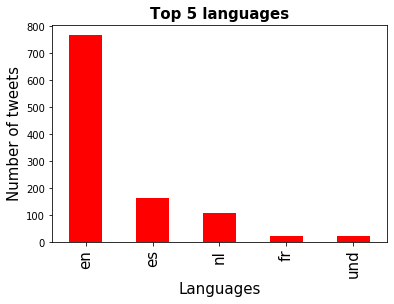

In [13]:
import matplotlib.pyplot as plt

# This is a directive that enables displaying charts in iPython notebooks.
%matplotlib inline


tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

We can do the same thing for countries:

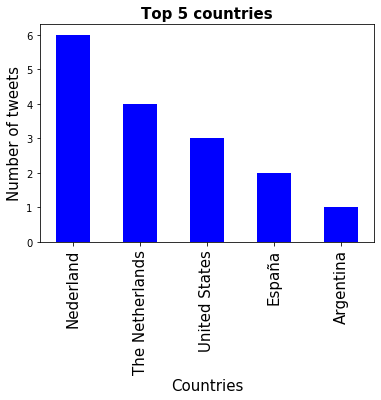

In [14]:
#Note - many times no country is scored, so you might have very few entries in this histogram (perhaps none or 1)

tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

### Food for thought

There are plenty of ways the gathered data can be skewed and manipulated a false image about something. This is a technique used in marketing very often. Can you think of ways to prove the statistic we displayed in the previos section as biased?

### Extracting links from tweets

Tweets very often carry additional context information to the statement they are making in a hyperlink. Extracting these hyperlinks from the tweets might provide an expansion for thte dataset you are collection or analyzing. A usefull skill in data science is to extract this type of information. We will do this by using regular expressions. Python provides a library for regular expression called re. 

We will start by importing this library and creating a function that checks if a specific keyword is present in a text and a second function that extracts the hyperlink from a the tweets content.

In [15]:
import re

# A function that extracts the hyperlinks from the tweet's content.
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

# A function that checks whether a word is included in the tweet's content
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

Next we add a column to our predifined Data Frame with:

In [16]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

With the help of this frame we can then print all the links from the tweets that we gathered and show them on the screen below:

In [17]:
print(tweets['link'])

0       https://t.co/46ayVmcuRT
1                              
2                              
3                              
4                              
5       https://t.co/opyUmj349n
6       https://t.co/6ZGefvVYVT
7                              
8       https://t.co/ndcv1hztj9
9                              
10                             
11                             
12      https://t.co/omPgzLVRBW
13      https://t.co/5VLR9FcGl6
14                             
15       https://t.co/adbwB81o…
16                             
17      https://t.co/UxmD4GtkEv
18                             
19      https://t.co/kyn9DwyxQE
20      https://t.co/Zerm9L3z4e
21      https://t.co/jzOBDFkvsg
22      https://t.co/vO4UUwoKg0
23                             
24      https://t.co/lMcw4BaWqg
25                             
26                             
27      https://t.co/OfRVp3NKw6
28                             
29      https://t.co/p5tI2zzxBd
                 ...           
1129    

**Removing Hyperlinks**

An additional use case that comes up from detecting the hyperlinks in the tweets is their removal. When subjecting the tweet's content to tokenization of mapping it with some sort of an embedding, it is recomended that artifacts like hyperlinks be removed first.

#### You have to define your own 'index_in_dataframe_containing_link'. Pick one of the non-null entries above from "print(tweets['link'])"

In [18]:
index_in_dataframe_containing_link = 0
unescaped_tweet = tweets_data[index_in_dataframe_containing_link]['text']
# With link in the content
print("With link:\n", unescaped_tweet)

# With the link removed
result = re.sub(r"http\S+", "", unescaped_tweet)
print ("\n\nLink free:\n",result)

With link:
 Best data type for PostgreSQL datatime type https://t.co/46ayVmcuRT #python


Link free:
 Best data type for PostgreSQL datatime type  #python


### Tokenization

**Definition**: Tokenization is the process of demarcating and possibly classifying sections of a string of input characters. The resulting tokens are then passed on to some other form of processing. The process can be considered a sub-task of parsing input.

In [19]:
from nltk.tokenize import RegexpTokenizer
import html.parser as HTMLParser# In Python 3.4+ import html 
import nltk

tokenizer = RegexpTokenizer(r'\w+')

dirty_tweet_tokens = tokenizer.tokenize(unescaped_tweet.lower())

cleaned_tweet_tokens = tokenizer.tokenize(result.lower())

print("Clean tokens:\n", cleaned_tweet_tokens)

print("\n\nDirty tokens:\n", dirty_tweet_tokens)

Clean tokens:
 ['best', 'data', 'type', 'for', 'postgresql', 'datatime', 'type', 'python']


Dirty tokens:
 ['best', 'data', 'type', 'for', 'postgresql', 'datatime', 'type', 'https', 't', 'co', '46ayvmcurt', 'python']


In [20]:
print("Actually got to this point and understood everything(!!!)")

Actually got to this point and understood everything(!!!)


You can notice that the tokens we get from the tweet containing the url have data that is not relevant to natural language and therfore any further analysis based on that.

## Sentiment Analysis

**Sentiment Analysis** is the process of determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker. A common use case for this technology is to discover how people feel about a particular topic.

There are two general directions in which you can steer your sentiment analysis pipeline:
+ Lexicon Based Approaches
+ Machine Learning Approaches

#### A Basic Machine Learning Approach

NLTK comes with all the pieces you need to get started on sentiment analysis: a movie reviews corpus with reviews categorized into pos and neg categories, and a number of trainable classifiers. We’ll start with a simple NaiveBayesClassifier as a baseline, using boolean word feature extraction.

**What is a Classifier?**

Wikipedia says: "<span style='color:red'>An algorithm that implements classification, especially in a concrete implementation, is known as a classifier. The term "classifier" sometimes also refers to the mathematical function, implemented by a classification algorithm, that maps input data to a category.</span>"

It is basically a computer program that learns how to map a certain input to a certain output. It is able to translate the data in the input space into a different segmented output space, where each datum belongs its own dimension. For our example we are going to use the Naive Bayes classifier. This classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. This makes this classifier simple and easy to use, however in a limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

So before we start doing anything we need a ready corpus of data we can use to demonstrate the concept of Sentiment Analysis.

In [ ]:
# This snippet downloads the most popular datasets for experimenting with NLTK functionalities.
import nltk
nltk.download('popular')

As a first step we import the required NLTK modules and define a simple function that is going to extract our features:


In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews


# A function that extracts which words exist in a text based on a list of words to which we compare.
def word_feats(words):
        return dict([(word, True) for word in words])

# Get the negative reviews for movies    
negids = movie_reviews.fileids('neg')

# Get the positive reviews for movies
posids = movie_reviews.fileids('pos')
 
# Find the features that most correspond to negative reviews    
negfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in negids]

# Find the features that most correspond to positive reviews
posfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in posids]

# We would only use 1500 instances to train on. The quarter of the reviews left is for testing purposes.
negcutoff = int(len(negfeats)*3/4)
poscutoff = int(len(posfeats)*3/4)

In [ ]:
# Construct the training dataset containing 50% positive reviews and 50% negative reviews
trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]

# Construct the negative dataset containing 50% positive reviews and 50% negative reviews
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]

print ('train on %d instances, test on %d instances' % (len(trainfeats), len(testfeats)))

# Train a NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(trainfeats)

# Test the trained classifier and display the most informative features.
print ('accuracy:', nltk.classify.util.accuracy(classifier, testfeats))
classifier.show_most_informative_features()

### Tweets Example

The previous was somewhat large scale. We had a dataset fo 2000 film reviews. A smaller tweet dataset would better serve our cause. See example below:

In [ ]:
# For this example we define our own dataset of 5 positive and 5 negative tweets.

# Positive tweets and their sentiment label
pos_tweets = [('I love this car', 'positive'),
              ('This view is amazing', 'positive'),
              ('I feel great this morning', 'positive'),
              ('I am so excited about the concert', 'positive'),
              ('He is my best friend', 'positive')]

# Negative tweets and their sentiment label
neg_tweets = [('I do not like this car', 'negative'),
              ('This view is horrible', 'negative'),
              ('I feel tired this morning', 'negative'),
              ('I am not looking forward to the concert', 'negative'),
              ('He is my enemy', 'negative')]

# The list of tweets we are going to use for testing (groundtruth)
test_tweets = [(['feel', 'happy', 'this', 'morning'], 'positive'),
    (['larry', 'friend'], 'positive'),
    (['not', 'like', 'that', 'man'], 'negative'),
    (['house', 'not', 'great'], 'negative'),
    (['your', 'song', 'annoying'], 'negative')]


We take both of those lists and create a single list of tuples each containing two elements. First element is an array containing the words and second element is the type of sentiment. We get rid of the words smaller than 2 characters and we use lowercase for everything.

In [ ]:
# pprint is a module for pretty printing
from pprint import pprint


tweets = []

# In this for loow we create a list of tuples like: (word_longer_than_3_letters, sentiment_label)
for (words, sentiment) in pos_tweets + neg_tweets:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets.append((words_filtered, sentiment))

# Printing how our dataset looks like after we have performed our own 'custom' tokenization of the tweets.
print("### Training examples ###\n")
pprint(tweets)

print("\n\n### Testing examples ###\n")
pprint(test_tweets)


Exactly like the example above, we define two functions. One for extracting the list of words in our tweet corpora and a second one to get the features on which we will train a classifier. In this case, our features would be the word appearance frequencies.

In [ ]:
# Get the separate words in tweets
# Input:  A list of tweets
# Output: A list of all words in the tweets
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

# Create a dictionary measuring word frequencies
# Input: the list of words
# Output: the frequency of those words apearing in tweets
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    print ("Word frequency list\n")
    pprint(wordlist)
    return word_features




To create a classifier, we need to decide what features are relevant. To do that, we first need a feature extractor. The one we are going to use returns a dictionary indicating what words are contained in the input passed. Here, the input is the tweet. We use the word features list defined above along with the input to create the dictionary.

With our feature extractor, we can apply the features to our classifier using the method apply_features. We pass the feature extractor along with the tweets list defined above.

In [ ]:
word_features = get_word_features(get_words_in_tweets(tweets))

# Construct our features based on which tweets contain which word
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


As you can see, **‘this’** is the most used word in our tweets, followed by **‘car’**, followed by **‘concert’**…

The variable ‘training_set’ contains the labeled feature sets. It is a list of tuples which each tuple containing the feature dictionary and the sentiment string for each tweet. The sentiment string is also called ‘label’.

In [ ]:
# Here we apply the features we constructed to our tweets data.
training_set = nltk.classify.apply_features(extract_features, tweets)

# Printing the resulting training set shows the features we are going to pass to the classifier.
pprint(training_set)

Now that we have our training set, we can train our classifier like in the previous example.

In [ ]:
# This is the line of code that we use to train our classifier. Training is performed in a streamlined way so no output is visible.
classifier = nltk.NaiveBayesClassifier.train(training_set)

The Naive Bayes classifier uses the prior probability of each label which is the frequency of each label in the training set, and the contribution from each feature. In our case, the frequency of each label is the same for ‘positive’ and ‘negative’. The word ‘amazing’ appears in 1 of 5 of the positive tweets and none of the negative tweets. This means that the likelihood of the ‘positive’ label will be multiplied by 0.2 when this word is seen as part of the input.

So in our dataset the probability of each label is 0.5 as we can see below.

### <span style='color:red'>**Interesting observation**</span>

If we observer the output of the function below, an interesting observation jumps out. Line one of the output has this content:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;contains(not) = False          positi : negati =      1.6 : 1.0

This line tells us that if a tweet doesn't contain the word not **(contains(not) = False)** than it is 60% more likely to be positive than negative visible in: **(positi : negati = 1.6 : 1.0)**.

In [ ]:
print (classifier.show_most_informative_features(32))

Now having seen the feature distribution for our data we can see how our classifier behaves in a real scenario where we apply it to a tweet it ahs not seen before and is not a part of the train or test set.

If our tweet is:
** Larry is my friend **

We would expect that the attributed sentiment would be: **positive**

In [ ]:
# The tweet we are about to classify
tweet = 'Larry is my friend'
print (classifier.classify(extract_features(tweet.split())))


On the other hand if our tweet is: **This dish is horrible**

We would expect that the attributed sentiment would be: **negative**

In [ ]:
# The tweet we are about to classify
tweet = 'This dish is horrible'
print (classifier.classify(extract_features(tweet.split())))

However our simple classifier, trained on just 10 tweets is easy to fool. For example we have not encountered the word **horrendous**. So if our tweet would be:

**Ivo listens to horrendous electronic music.**

We would not know what to expect.

In [ ]:
tweet = 'Ivo listens to horrendous electronic music'
print (classifier.classify(extract_features(tweet.split())))

In our case, the simple classifier made a mistake.

## Topic Modeling

One technique for text mining in Data Science is Topic Modelling. As the name suggests, it is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. Thus, assisting better decision making.

Topic Modelling is different from rule-based text mining approaches that use regular expressions or dictionary based keyword searching techniques. It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.

Topics can be defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model should result in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, and “farm”, “crops”, “wheat” for a topic – “Farming”.

Topic Models are very useful for the purpose for document clustering, organizing large blocks of textual data, information retrieval from unstructured text and feature selection. For Example – New York Times are using topic models to boost their user – article recommendation engines. Various professionals are using topic models for recruitment industries where they aim to extract latent features of job descriptions and map them to right candidates. They are being used to organize large datasets of emails, customer reviews, and user social media profiles.

### What is Latent Dirichlet Allocation (LDA)?

There are many approaches for obtaining topics from a text such as – Term Frequency and Inverse Document Frequency. NonNegative Matrix Factorization techniques. Latent Dirichlet Allocation is the most popular topic modeling technique and in this article, we will discuss the same.

LDA assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.

LDA is a matrix factorization technique. In vector space, any corpus (collection of documents) can be represented as a document-term matrix. 



### LDA Parameters

Alpha and Beta Hyperparameters – alpha represents document-topic density and Beta represents topic-word density. Higher the value of alpha, documents are composed of more topics and lower the value of alpha, documents contain fewer topics. On the other hand, higher the beta, topics are composed of a large number of words in the corpus, and with the lower value of beta, they are composed of few words.

Number of Topics – Number of topics to be extracted from the corpus. Researchers have developed approaches to obtain an optimal number of topics by using Kullback Leibler Divergence Score. I will not discuss this in detail, as it is too mathematical. For understanding, one can refer to this[1] original paper on the use of KL divergence.

Number of Topic Terms – Number of terms composed in a single topic. It is generally decided according to the requirement. If the problem statement talks about extracting themes or concepts, it is recommended to choose a higher number, if problem statement talks about extracting features or terms, a low number is recommended.

Number of Iterations / passes – Maximum number of iterations allowed to LDA algorithm for convergence.


### Sample Topic Modeling Assignment

As step one of this assignment we will construct our own dataset containing 5 documents on different topics like below:


In [ ]:
doc1 = "Working out is great for the body. Fitness makes you feel good."
doc2 = "Red cars are faster than blue cars."
doc3 = "Doctors suggest that fitness increases muscle mass and speeds up metabolism."
doc4 = "Cars with electrical engines cause less polution than cars with internal combustion engines."
doc5 = "Pushups make a good upper body excercise."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

We already noted that cleaning is an important step before any text mining task, in this step, we will remove the punctuations, stopwords and normalize the corpus. This makes it suitable for further analysis.

We introduced the word <i>stopwords</i>. Stopwords are words that are filtered out before any analysis of natural language in order to increase efficiency and remove clutter. Examples of stop words are:
+ and
+ there
+ want
+ thus
+ if 
+ etc...

Another new thing we will encounter in the code below is a Lemmatizer. A lematizer rests on the lemmatization process which essentially extracts the root of the word and removes any additional artifacts. A more formal definition is provided below:

<span style='color:red'>Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. </span>

**Note**: If unclear about the implementation of the methods please consult the NLTK documentation.

In [ ]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Create a set of stopwords
stop = set(stopwords.words('english'))

# Create a set of punctuation words 
exclude = set(string.punctuation) 

# This is the function makeing the lemmatization
lemma = WordNetLemmatizer()

# In this function we perform the entire cleaning
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# This is the clean corpus.
doc_clean = [clean(doc).split() for doc in doc_complete] 

### Preparing Document-Term Matrix

All the text documents combined is known as the corpus. To run any mathematical model on text corpus, it is a good practice to convert it into a matrix representation. LDA model looks for repeating term patterns in the entire DT matrix. Python provides many great libraries for text mining practices, “gensim” is one such clean and beautiful library to handle text data. It is scalable, robust and efficient. 

Following code shows how to convert a corpus into a document-term matrix.

In [ ]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

### Run the LDA model

Next step is to create an object for LDA model and train it on Document-Term matrix. The training also requires few parameters as input which are explained in the above section. The gensim module allows both LDA model estimation from a training corpus and inference of topic distribution on new, unseen documents.


In the code below we are running the LDA model on two topics with the words we have defined in our dictionary for 100 itterations. Feel free to change the number of itterations and see the outcome.

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

Each line is a topic with individual topic terms and weights. Topic1 can be termed as Vehicles and Engines, and Topic 2 can be termed as Benefits of Fitness.

In [ ]:
# Print 2 topics and describe then with 4 words.
topics = ldamodel.print_topics(num_topics=2, num_words=4)

i=0
for topic in topics:
    print ("Topic",i ,"->", topic)     
    i+=1


We notice that our LDA model performed well in guessing the two topics our documents covered.

## Assignment
### This assignment should result in a report following the report guidelines found on Canvas.
### Due date: <b style='color: red'>  27/09/19, 23:59:59 </b>

So far we have covered the following sections:

+ Basic Python development
+ Pandas data management
+ Gathering data (scraping the Twitter Streaming API)
+ Storing and organizing it (store to file or a database)
+ Preprocessing the data
+ Performing sentiment and topical analysis
+ Visualizing insight

Given the newly acquired skills, your assignment is to perform an analysis on a dataset of tweets already provided in the course. The analysis should contain topic modelling and sentiment analysis. Use different splits of the data you have to perform your analysis, compare, correlate and visualize.

The dataset can be found on Canvas in the "Assignments" folder.

All of the tweets have geolocation on them so it would be natural to show the geographical distribution of the analysis you performed on the map you designed in Week 2 of the course. When visualizing the results of your analysis keep in mind that you can change the size, color, location or even boundries of the map. You can also hide and show regions depending on what is the point you are trying to make.

Make sure to correlate the findings with:
+ Demographics
+ Education
+ Income
+ Health care
+ Religion

This information can be obtained from the sources mentioned in the lectures.

As an additional resource to help with the sentiment analysis, there is a Java based utility in the same folder named SentiStrenght. You can use this to confirm your results or as an additional case study.

[Sentistrength (Free download version)](http://sentistrength.wlv.ac.uk/#Download)

In [21]:
import json


In [35]:
tweet_data=[]
data= open ('geotagged_tweets_20160812-0912.jsons')
new_data=data.readline()
data.close()
for line in new_data:
    tweet=json.loads(new_data)
    tweet_data.append(tweet)

In [36]:
tweets_new_data=pd.DataFrame(tweet_data)

In [37]:
list(tweets_new_data)

['contributors',
 'coordinates',
 'created_at',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'retweet_count',
 'retweeted',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'user']